

# Project: Investigate a Dataset (TMDB_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project we will analyse  TMDB movies dataset that contais more than 10 thousands movies and 21 column.The datadset includes features such as rating,revenue,imd_id,budget ..etc.Our goal is to analyse movies associated with profits,rating,revenus and other associated features.We will start brainstorming about what quistions should we ask and answer them by vesulizing the data. 
>Question to analyse from dataset:
> 1. What is the movie that  have most and least profit?
> 2.  What are the profit trends of movies from year to year?
> 3. Which variables affect the revenue and popularity of a movie?
> 4. Top 10 movies based on profit 
> 5. Top 10 movies based on vote count
> 6. Successful genres (based on profit ).
> 7. Successful genres (based on vote count).
> 7. Successful cast (based on profit).
> 7. Successful cast (based on vote count).








In [470]:
#Imports important packages 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section : 

> 1. we will clean the data.

> 2.Drop unused columns/rows.

> 3.Fill na values with the np.nan. 

This will help us to analyse the data based on the quistons.  


### General Properties

In [471]:

#reading csv tmdb dataset
df_movies = pd.read_csv('tmdb-movies.csv')
#printing first five rows with defined columns
df_movies.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [472]:
#looking for the datatype and finding missing values 
df_movies.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [473]:
# First lets assess the data to identify any problem


rows,columns =  df_movies.shape
print('There are {} and {} columns in TMDB dataset '.format(rows,columns))

There are 10866 and 21 columns in TMDB dataset 


In [474]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [475]:
df_movies.query('budget==0').count()

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

In [476]:
df_movies.query('revenue==0').count()

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

In [477]:
df_movies.query('runtime==0').count()

id                      31
imdb_id                 31
popularity              31
budget                  31
revenue                 31
original_title          31
cast                    31
homepage                 6
director                29
tagline                  5
keywords                15
overview                29
runtime                 31
genres                  30
production_companies    13
release_date            31
vote_count              31
vote_average            31
release_year            31
budget_adj              31
revenue_adj             31
dtype: int64

In [478]:
df_movies.query('vote_count==0').count()


id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [479]:
# Duplicated values
df_movies.duplicated().sum()

1

In [480]:
#Unique values
df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

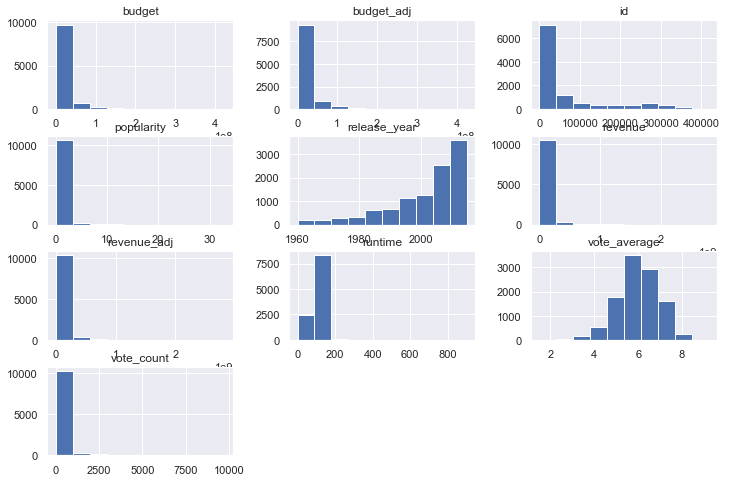

In [481]:
df_movies.hist(figsize=(12,8));


### Data Cleaning (Dropping unused Data)
> 1. Remove unused culmns such as budget_adj,revenue_adj,vote_average,overview etc.
> 2. Removing duplicated rows .
> 3. Replacing zero values with np.nan
> 4. Changing relase_date to date format 


#### First Delete unused columns

In [482]:
#drop unused columns 
df_movies.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline','vote_average','keywords'],axis =1,inplace = True)

In [483]:
rows,columns =  df_movies.shape
print('There are {} columns in TMDB dataset after dropping unused columns'.format(columns))

There are 13 columns in TMDB dataset after dropping unused columns


#### Drop Duplicated Values

In [484]:
df_movies.drop_duplicates(inplace =True)
duplicat_count =  df_movies.duplicated().sum()
print('There is {} duplicate count'.format(duplicat_count))

There is 0 duplicate count


#### Change relase_date to date format

In [485]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
print(df_movies['release_date'].dtypes)

datetime64[ns]


#### Replacing zero with np.nan values

In [486]:
df_movies.replace(0, np.NAN)
df_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015


In [487]:
df_movies.dropna(inplace = True)
rows, col = df_movies.shape

print('There are  {} rows'.format(rows))

There are  9772 rows


#### Add new column wich is profit to the dataset

In [488]:
df_movies['profit'] = df_movies['revenue']-df_movies['budget']
df_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015,1316249360


### Add functions and attributes  that will be used before analayse data

In [489]:
#defining the function column,True=high,False for 
def calc_idmax_min(column_name,idmax=False):
#
 if(idmax == True):
    column_indx= df_movies[column_name].idxmax()
    return  pd.Series(df_movies.loc[column_indx])
 else:
        column_indx= df_movies[column_name].idxmin()
        return pd.Series(df_movies.loc[column_indx])
   #This function will seprate data neede such as cast,genres 
def seprate_column(data,column):
    #will take a column, and separate the string by '|' based on data needed
    data = data[column].str.cat(sep = '|')
    #giving pandas series
    data = pd.Series(data.split('|'))
   ## print(data)
    #arranging in descending order
    
    return data

In [490]:
#These columns will be used for seprating data needed
used_columns = ['release_year','original_title', 'cast', 'director', 'production_companies', 'genres', 'budget', 'revenue', 'runtime','profit','vote_count']

In [491]:
#This attribute will hold the movies based on profit that more than average 
profit_df = df_movies.query('profit>{}'.format(df_movies['profit'].mean()))[used_columns]
profit_df.head()

,release_year,original_title,cast,director,production_companies,genres,budget,revenue,runtime,profit,vote_count
0,2015,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,150000000,1513528810,124,1363528810,5562
1,2015,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,Action|Adventure|Science Fiction|Thriller,150000000,378436354,120,228436354,6185
2,2015,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,Adventure|Science Fiction|Thriller,110000000,295238201,119,185238201,2480
3,2015,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Action|Adventure|Science Fiction|Fantasy,200000000,2068178225,136,1868178225,5292
4,2015,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Universal Pictures|Original Film|Media Rights ...,Action|Crime|Thriller,190000000,1506249360,137,1316249360,2947


In [492]:
#This attribute will hold the movies based on vote_count that more than average votes
vote_count_df = df_movies.query('vote_count >{}'.format(df_movies['vote_count'].mean()))[used_columns]
vote_count_df.head()

,release_year,original_title,cast,director,production_companies,genres,budget,revenue,runtime,profit,vote_count
0,2015,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,150000000,1513528810,124,1363528810,5562
1,2015,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,Action|Adventure|Science Fiction|Thriller,150000000,378436354,120,228436354,6185
2,2015,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,Adventure|Science Fiction|Thriller,110000000,295238201,119,185238201,2480
3,2015,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Action|Adventure|Science Fiction|Fantasy,200000000,2068178225,136,1868178225,5292
4,2015,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Universal Pictures|Original Film|Media Rights ...,Action|Crime|Thriller,190000000,1506249360,137,1316249360,2947


In [493]:
print('Average Budget',df_movies['budget'].mean())

Average Budget 16179667.921715105


In [494]:
print('Average Revenue',df_movies['revenue'].mean())

Average Revenue 44231208.89357348


In [495]:
print('Average Profit :',df_movies['revenue'].mean() - df_movies['budget'].mean())

Average Profit : 28051540.971858375


<a id='eda'></a>
## Exploratory Data Analysis

> Aftear cleaning the data , now we can start analysing the data based on our quistions .

### Research Question 1 (What is the movie that  have most and least profit?)

In [496]:
# Using function calc_idmax_min to find the result
max_profit = calc_idmax_min('profit',True)
max_movie_title = max_profit.original_title
max_movie_profit = max_profit.profit
print('{} has the most profit which is {}'.format(max_movie_title,max_movie_profit))

Avatar has the most profit which is 2544505847


In [497]:
# Using function calc_idmax_min to find the result
max_profit = calc_idmax_min('profit',False)
max_movie_title = max_profit.original_title
max_movie_profit = max_profit.profit
print('{} has the least profit which is {}'.format(max_movie_title,max_movie_profit))

The Warrior's Way has the least profit which is -413912431


As we can see based on the profit the most profit earned was Avatar wich is $25,445,058,47 
The least profit earned was The Warrior's Way has the least profit which is -413912431 of losing comparing to its budget

### Research Question 2  (What are the profit trends of movies from year to year?)

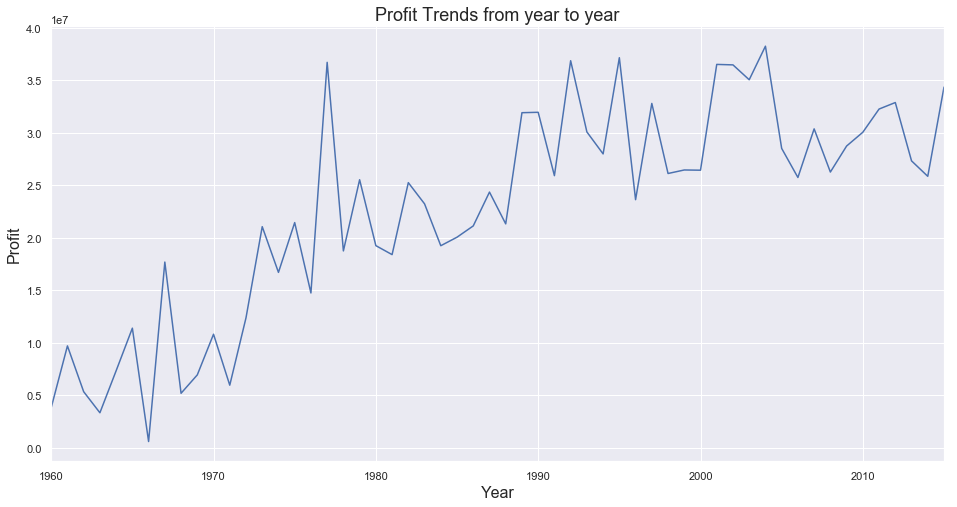

In [498]:
df_movies.groupby('release_year')['profit'].mean().plot( figsize = (16, 8), color = 'b')
plt.title('Profit Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit', fontsize = 16);


As we can see the profit trends is increasing after the 80s .It reached the highst in the middle of the 70s. After the 20s it  started to increas till now with a little of waves .
In general ,Profits have been increased after the 21 century .

### Research Question 3  (Which variables affect the revenue and popularity of a movie?)

In [499]:
# Used the function corr for correlation of columns
df_movies.corr()


,id,popularity,budget,revenue,runtime,vote_count,release_year,profit
id,1.000000,0.002229,-0.136511,-0.095342,-0.097810,-0.026940,0.509448,-0.071870
popularity,0.002229,1.000000,0.538921,0.662405,0.156290,0.802956,0.110944,0.629354
budget,-0.136511,0.538921,1.000000,0.731204,0.214292,0.627068,0.138239,0.566090
revenue,-0.095342,0.662405,0.731204,1.000000,0.183293,0.788533,0.071738,0.976261
runtime,-0.097810,0.156290,0.214292,0.183293,1.000000,0.184285,-0.133793,0.153456
vote_count,-0.026940,0.802956,0.627068,0.788533,0.184285,1.000000,0.124726,0.753782
release_year,0.509448,0.110944,0.138239,0.071738,-0.133793,0.124726,1.000000,0.042797
profit,-0.071870,0.629354,0.566090,0.976261,0.153456,0.753782,0.042797,1.000000


#### For popularity prespective , we notice that :
> 1 - revenue,vote_count,profit as strong correlation.

> 2- Moderate corrlation with budget


#### For revenue prespective , we notice that :
> 1 - popularity,vote_count,budget as strong correlation.

> 2- Weak corrlation with runtime



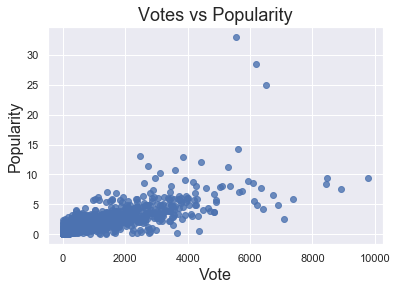

In [500]:
sns.regplot(x = df_movies['vote_count'], y = df_movies['popularity'], fit_reg = False)
plt.title('Votes vs Popularity', fontsize = 18)
plt.xlabel('Vote', fontsize = 16)
plt.ylabel('Popularity', fontsize = 16);

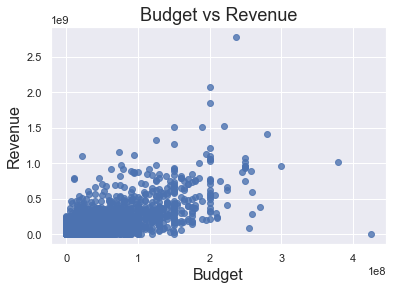

In [501]:
sns.regplot(x = df_movies['budget'], y = df_movies['revenue'], fit_reg = False)
plt.title('Budget vs Revenue', fontsize = 18)
plt.xlabel('Budget', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16);

### Research Question 4 (Top 10 movies based on profit?)


In [502]:
#we use the same value that we declared early profit_df
profit_df.sort_values('profit', ascending = False).head(10)


,release_year,original_title,cast,director,production_companies,genres,budget,revenue,runtime,profit,vote_count
1386,2009,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...,Action|Adventure|Fantasy|Science Fiction,237000000,2781505847,162,2544505847,8458
3,2015,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,Action|Adventure|Science Fiction|Fantasy,200000000,2068178225,136,1868178225,5292
5231,1997,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Paramount Pictures|Twentieth Century Fox Film ...,Drama|Romance|Thriller,200000000,1845034188,194,1645034188,4654
0,2015,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,150000000,1513528810,124,1363528810,5562
4,2015,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Universal Pictures|Original Film|Media Rights ...,Action|Crime|Thriller,190000000,1506249360,137,1316249360,2947
4361,2012,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Marvel Studios,Science Fiction|Action|Adventure,220000000,1519557910,143,1299557910,8903
3374,2011,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,Warner Bros.|Heyday Films|Moving Picture Compa...,Adventure|Family|Fantasy,125000000,1327817822,130,1202817822,3750
14,2015,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,Marvel Studios|Prime Focus|Revolution Sun Studios,Action|Adventure|Science Fiction,280000000,1405035767,141,1125035767,4304
5422,2013,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Walt Disney Pictures|Walt Disney Animation Stu...,Animation|Adventure|Family,150000000,1274219009,102,1124219009,3369
8094,1995,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Columbia Pictures,Crime|Drama|Mystery|Thriller|Action,22000000,1106279658,114,1084279658,201


### Research Question 5 (Top 10 movies based on vote count?)

In [503]:
#we use the same value that we declared early vote_count_df
vote_count_df.sort_values('vote_count', ascending = False).head(10)

,release_year,original_title,cast,director,production_companies,genres,budget,revenue,runtime,profit,vote_count
1919,2010,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,Legendary Pictures|Warner Bros.|Syncopy,Action|Thriller|Science Fiction|Mystery|Adventure,160000000,825500000,148,665500000,9767
4361,2012,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Marvel Studios,Science Fiction|Action|Adventure,220000000,1519557910,143,1299557910,8903
1386,2009,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...,Action|Adventure|Fantasy|Science Fiction,237000000,2781505847,162,2544505847,8458
2875,2008,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,Drama|Action|Crime|Thriller,185000000,1001921825,152,816921825,8432
4364,2012,Django Unchained,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...,Quentin Tarantino,Columbia Pictures|The Weinstein Company,Drama|Western,100000000,425368238,165,325368238,7375
4382,2012,The Hunger Games,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Gary Ross,Lionsgate|Color Force,Science Fiction|Adventure|Fantasy,75000000,691210692,142,616210692,7080
5425,2013,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,Marvel Studios,Action|Adventure|Science Fiction,200000000,1215439994,130,1015439994,6882
4363,2012,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Christopher Nolan,Legendary Pictures|Warner Bros.|DC Entertainme...,Action|Crime|Drama|Thriller,250000000,1081041287,165,831041287,6723
629,2014,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Paramount Pictures|Legendary Pictures|Warner B...,Adventure|Drama|Science Fiction,165000000,621752480,169,456752480,6498
4367,2012,The Hobbit: An Unexpected Journey,Ian McKellen|Martin Freeman|Richard Armitage|A...,Peter Jackson,WingNut Films|New Line Cinema|Metro-Goldwyn-Ma...,Adventure|Fantasy|Action,250000000,1017003568,169,767003568,6417


### Research Question 6 (Successful genres (based on profit )?)

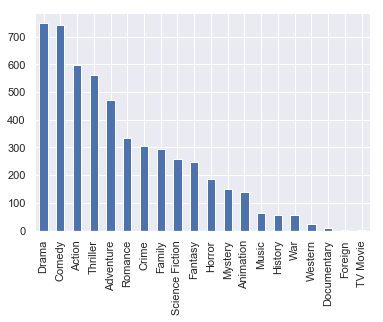

In [504]:
# we use the funcetion we declared early seprate_column
data_profit = seprate_column(profit_df,'genres')
data_profit.value_counts(ascending = False).head(20).plot(kind='bar');

### Research Question 7 (Successful genres (based on vote_count )?)


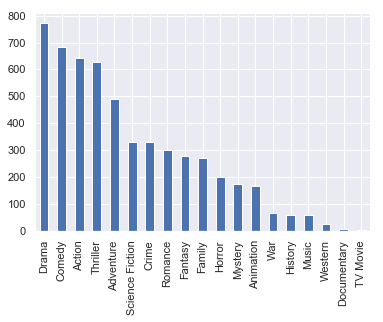

In [505]:
# we use the funcetion we declared early seprate_column

data_votes = seprate_column(vote_count_df,'genres')
data_votes.value_counts(ascending = False).head(20).plot(kind='bar');

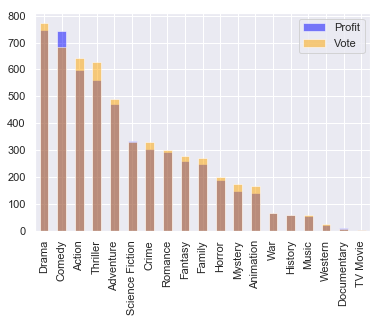

In [506]:
data_profit.value_counts(ascending = False).head(20).plot(kind='bar',alpha=0.5,color='blue',label='Profit');
data_votes.value_counts(ascending = False).head(20).plot(kind='bar',alpha=0.5,color='orange',label='Vote');
plt.legend();


As we can see, quistion 6 comedy and drama are the most succesful genres.
On the other hand, quistion 7 drama is the successful genres based on vote counts 

### Research Question 8 (Successful cast (based on profit )?)



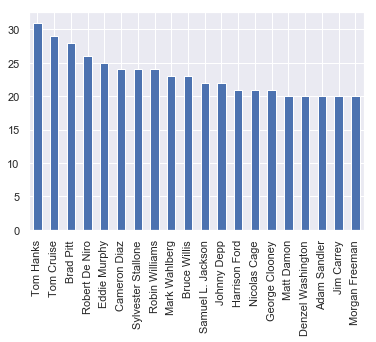

In [507]:
# we use the funcetion we declared early seprate_column
cast_profit = seprate_column(profit_df,'cast')
cast_profit.value_counts(ascending = False).head(20).plot(kind='bar');

### Research Question 9 (Successful cast (based on vote_count )?)



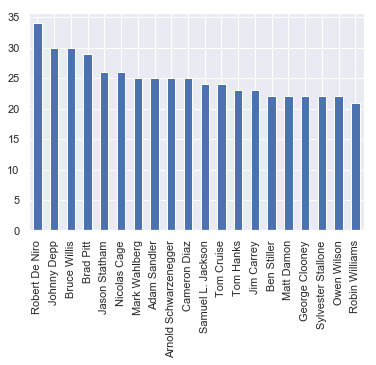

In [508]:
# we use the funcetion we declared early seprate_column
cast_votes = seprate_column(vote_count_df,'cast')
cast_votes.value_counts(ascending = False).head(20).plot(kind='bar');

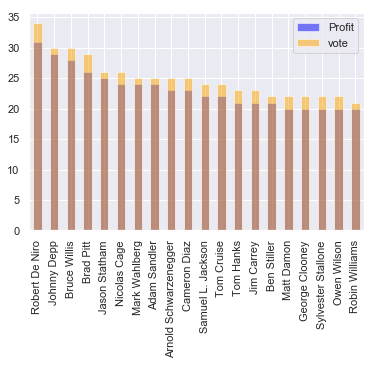

In [509]:
cast_profit.value_counts().head(20).plot(kind='bar',alpha=0.5,color='blue',label='Profit');
cast_votes.value_counts().head(20).plot(kind='bar',alpha=0.5,color='orange',label='vote');
plt.legend();

As we can see , Tom Hancks , Robert De Niro are the top 20 based on votes and profit 

<a id='conclusions'></a>
## Conclusions

Finally, from the analysis we can find the criterias of making successful movie.
1- If we have a drama genres and the actor are Tom ancks and Robert De Niro, it will be a successful movie based on the analysis we did.

2 - Generes must be: Dama,Comedy,Action and advanture

3- Movie shouldincludes: Tom Hancks,Tom Cruis,Rober De Neiro,Brad Pitt

4 - Budget should be More Than 50 million dollar 

All this analysis was having limitation of average vote and profit
